In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import utils as np_utils

import official.nlp.bert.bert_models
import official.nlp.bert.configs
import official.nlp.bert.run_classifier
import official.nlp.bert.tokenization as tokenization

# %config Completer.use_jedi = False
# %config IPCompleter.greedy=True

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

1 Physical GPUs, 1 Logical GPUs
Version:  2.4.0
Eager mode:  True
Hub version:  0.11.0
GPU is available


In [3]:
# Read file
data = pd.read_csv('datasets/IMDB Dataset.csv',
                   encoding='ISO-8859-1')

In [4]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
data.sentiment.unique()

array(['positive', 'negative'], dtype=object)

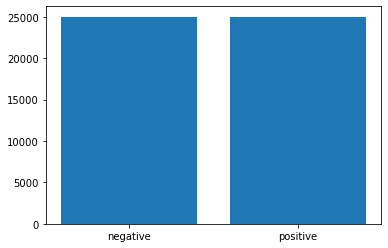

In [6]:
# Distribution of data under target classes
classes = data.sentiment.unique()
counts = []

for i in classes:
  count = len(data[data.sentiment==i])
  counts.append(count)

plt.bar(['negative', 'positive'], counts)
plt.show()

In [7]:
# Split dataset
x = data['review']
y = data['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [8]:
x_train.describe()

count                                                 40000
unique                                                39725
top       Loved today's show!!! It was a variety and not...
freq                                                      4
Name: review, dtype: object

In [9]:
x_test.describe()

count                                                 10000
unique                                                 9986
top       Okay, you have:<br /><br />Penelope Keith as M...
freq                                                      2
Name: review, dtype: object

In [10]:
# Encode target values

encoder = LabelEncoder()
encoder.fit(y)
encoded_Y_test = encoder.transform(y_test)
encoded_Y_train = encoder.transform(y_train)

# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)
dummy_y_train = np_utils.to_categorical(encoded_Y_train)

### Tokenization

In [11]:
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/2",
                            trainable=True)

In [12]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

In [13]:
tokenizer

In [14]:
do_lower_case

False